<a href="https://colab.research.google.com/github/jeftersantiago/ic_redes_complexas/blob/master/igraph/Nocoes_basicas_redes_igraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do notebook

A forma como aprendi a usar a biblioteca foi seguindo principalmente o tutorial do pacote que está nesse [link](https://igraph.org/python/tutorial/0.9.8/tutorial.html), a segui aprendi conforme os tópicos listados no indíce. 
Algumas das páginas não foram bastante claras nas suas explicações de usabilidade, com poucos exemplos ou explicações que não entendi, nesses casos eu busquei outras opções online e as referenciei no notebook conforme foi necessário.



- Link da documentação do **igraph**: https://igraph.readthedocs.io/en/stable/index.html 

- Tutorial do igraph https://igraph.org/python/tutorial/0.9.8/tutorial.html


- Documentação extra: encontrei na internet https://alvinntnu.github.io/python-notes/statistical-analyses/network-analysis.html

# Lista de conteúdos

 - [X] Criação e manipulação de grafos 
   - [X] Criando grafos: criei grafos a partir de listas de arestas ou vertices,
     para esse trabalho ainda não precisei abortar geração de grafos a partir
     de dados ou algo parecido.
   - [X] Manipulação de grafos: adição e remoção de vertices e arestas.
   - [X] Visualização de grafos: como desenhar grafos.
 - [X] Grafos dirigidos e grafos ponderados: criação dos dois tipos de grafos.
 - [ ] Operações envolvendo grafos 
   - [X] Acesso à vertices e arestas.
   - [X] União e composição de grafos.
   - [ ] Conversão de grafos 
     - [X] Grafos dirigidos em não dirigidos.
     - [X] Grafos nao dirigidos em dirigidos.
     - [ ] Grafos ponderados em nao ponderados.
 - [ ] Propriedades estruturais de grafos (ou resultados em redes complexas)
   - [ ] Detectar componentes de uma rede
   - [ ] Acesso a vizinhos em uma rede
   - [ ] Medidas de conectividade.
   - [ ] Medidas de centralidade.
   - [ ] Medidas de transitividade.
 - [ ] Modelos de grafos 
   - [ ] Grafos aleatórios
   - [ ] Grafo de Erdos-Renyi (Modelo $G_{np}$)
   - [ ] Modelo de Barabási-Albert






# Pacotes utilizados

In [ ]:
!pip install igraph
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Lista de links importantes da documentação do igraph-python

- Lista de funções https://igraph.org/python/api/latest/igraph._igraph.Vertex.html

# Criação e manipulação de grafos

Construtores do objeto grafo: https://igraph.readthedocs.io/en/stable/api/igraph.Graph.html

Layout para grafos: https://igraph.org/python/tutorial/0.9.6/visualisation.html#graph-layouts

## Criação de grafos

In [ ]:
g = ig.Graph() 

### Criando grafo a partir de lista de areastas

In [ ]:
edgelist = [[0, 1], [1, 2], [2, 0], [3, 2], [5, 0], [5, 1], [5, 3], 
   [4, 3], [4, 0], [2, 5]]

g = ig.Graph(n = 6, edges = edgelist)

- Documentação/tutorial sobre como fazer visualização dos grafos com igraph https://igraph.org/python/tutorial/0.9.8/tutorial.html#vertex-attributes-controlling-graph-plots

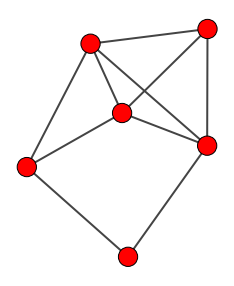

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
layout = g.layout("auto")
ig.plot(g, target=ax, layout=layout)
plt.show()

## Manipulação de grafos: adição e remoção de vertices e arestas

### Adicionar vertices

In [ ]:
g.add_vertices(2)

### Adicionar arestas

In [ ]:
g.add_edges([(6, 7), (6, 5), (6, 1), (7, 4), (7, 2)])

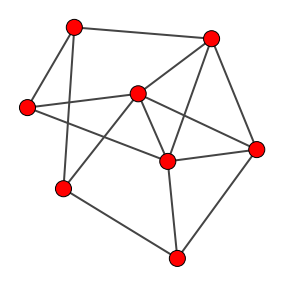

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
layout = g.layout("auto")
ig.plot(g, target=ax, 
            layout=layout)
plt.show()

### Removendo vertices e arestas

In [ ]:
g.delete_vertices(2)
# delete_edges recebe o id da aresta em questao, que é dada pela tupla dos vertices
g.delete_edges(g.get_eid(3, 2))

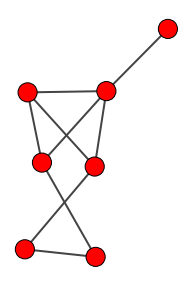

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
layout = g.layout("auto")
ig.plot(g, target=ax, layout=layout)
plt.show()

## Grafos dirigidos

In [ ]:
edgelist = [(0, 1), (0, 2), (1, 2), (2, 3), (2, 5), (4, 3), (4, 1)]
g =  ig.Graph(n = 5, edges = edgelist, directed = True)

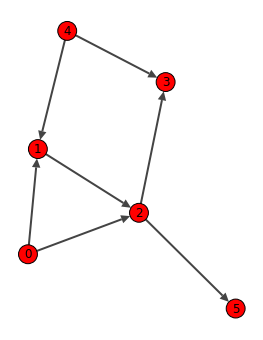

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ig.plot(g, 
        target=ax, 
        vertex_label=range(g.vcount()), 
        edge_align_label=True,
        edge_background='white',
        layout="auto")
plt.show()

## Grafos ponderados

In [ ]:
edgelist = [(0, 1), (0, 2), (1, 2), (2, 3), (2, 5), (4, 3), (4, 1)]
edge_weights = {'weight': [0.1, 1.3, 100.5, 50.6, 0.03, 5.3, 9.1, 15.9, 0.001]}
g = ig.Graph(n = 6, 
             edges = edgelist,
             edge_attrs = edge_weights,
             directed = False
            )

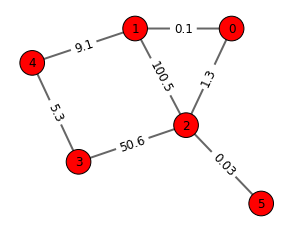

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
  g,
  target=ax,
  edge_label=g.es()['weight'],
  vertex_label=range(g.vcount()),
  edge_color='#666',
  edge_align_label=True,
  edge_background='white'
)
plt.show()

#### Adicionando uma aresta com peso

In [ ]:
g.add_edge(5, 1, weight = 1.99)

igraph.Edge(<igraph.Graph object at 0x7f00fdfa4240>, 7, {'weight': 1.99})

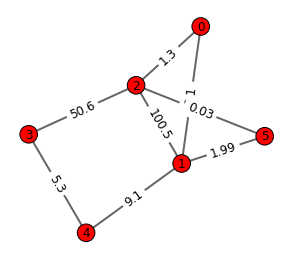

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
  g,
  target=ax,
  edge_label=g.es()['weight'],
  vertex_label=range(g.vcount()),
  edge_color='#666',
  edge_align_label=True,
  edge_background='white'
)
plt.show()

### Criação de grafos a partir de matriz de adjacências

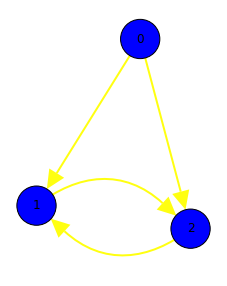

In [ ]:
adj = [[0, 1, 1], [0, 0, 1], [0, 1, 0]]
g = ig.Graph.Adjacency(adj)


fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
  g,
  target=ax,
  vertex_label=range(g.vcount()),
  vertex_color="blue",
  edge_color='#ff1',
  edge_background='white'
)
plt.show()


## Acessando vertices e arestas

In [ ]:
edgelist = [(0, 1), (0, 2), (1, 2), (2, 3), (2, 5), (4, 3), (4, 1)]
g =  ig.Graph(n = 5, edges = edgelist, directed = False)

**OBS**: Nesse ponto tentei gerar imagem de um grafo com o texto dos vertices em branco e tive um problema: o atributo especificado pela biblioteca não funciona [essa](https://igraph.org/python/tutorial/0.9.8/tutorial.html#vertex-attributes-controlling-graph-plots) tabela contém atributos que não funcionam.
O `vertex_label_color` não diz qual formato de cor aceita, se é como CSS ou rgb, etc, então fui testando de todas as formas. Nenhuma delas funcionou.

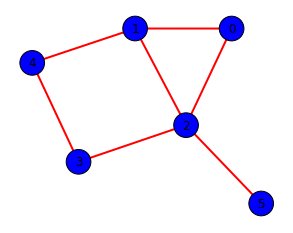

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
  g,
  target=ax,
  vertex_color="blue",
  vertex_label=range(g.vcount()),
  edge_color='red',
  edge_align_label=True,
)
plt.show()

In [ ]:
# Acessando vertices
for vertice in g.vs():
  print(vertice)

igraph.Vertex(<igraph.Graph object at 0x7f00fdfa4a40>, 0, {})
igraph.Vertex(<igraph.Graph object at 0x7f00fdfa4a40>, 1, {})
igraph.Vertex(<igraph.Graph object at 0x7f00fdfa4a40>, 2, {})
igraph.Vertex(<igraph.Graph object at 0x7f00fdfa4a40>, 3, {})
igraph.Vertex(<igraph.Graph object at 0x7f00fdfa4a40>, 4, {})
igraph.Vertex(<igraph.Graph object at 0x7f00fdfa4a40>, 5, {})


In [ ]:
for edge in g.es():
  print(edge)

igraph.Edge(<igraph.Graph object at 0x7f00fdfa4a40>, 0, {})
igraph.Edge(<igraph.Graph object at 0x7f00fdfa4a40>, 1, {})
igraph.Edge(<igraph.Graph object at 0x7f00fdfa4a40>, 2, {})
igraph.Edge(<igraph.Graph object at 0x7f00fdfa4a40>, 3, {})
igraph.Edge(<igraph.Graph object at 0x7f00fdfa4a40>, 4, {})
igraph.Edge(<igraph.Graph object at 0x7f00fdfa4a40>, 5, {})
igraph.Edge(<igraph.Graph object at 0x7f00fdfa4a40>, 6, {})


## Operações de união e composição

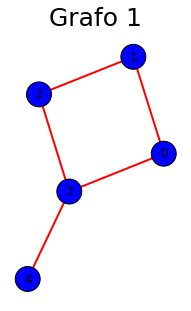

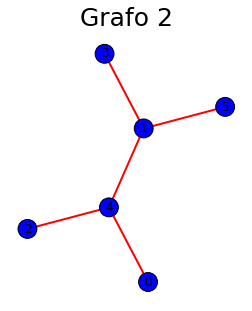

In [ ]:
edgelist = [(0, 1), (1, 2), (3, 2), (3, 0), (4, 3)]
g1 = ig.Graph(n = 5, edges = edgelist, directed = False)
edgelist = [(5, 1), (1, 4), (1, 3), (4, 2), (0, 4)]
g2 = ig.Graph(n = 5, edges = edgelist, directed = False)


fig, ax = plt.subplots(figsize=(5,5))
plt.title("Grafo 1", fontsize = 25)

ig.plot(
  g1, target=ax, vertex_color="blue", vertex_label=range(g1.vcount()), edge_color='red',  edge_align_label=True)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
plt.title("Grafo 2", fontsize = 25)
ig.plot(
  g2, target=ax, vertex_color="blue", vertex_label=range(g2.vcount()), edge_color='red',  edge_align_label=True)
plt.show()


### União de grafos

A função `union` do `igraph` funciona de maneira semelhante à do NetworkX.

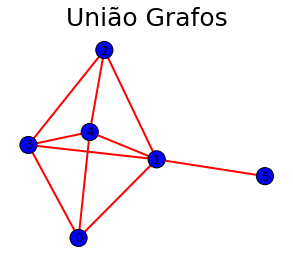

In [ ]:
g_union = ig.union([g1, g2], byname='auto')

fig, ax = plt.subplots(figsize=(5,5))
plt.title("União Grafos", fontsize = 25)
ig.plot(
  g_union, target=ax, vertex_color="blue", vertex_label=range(g_union.vcount()), edge_color='red',  edge_align_label=True)
plt.show()

### União disjunta

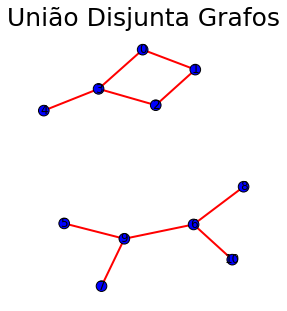

In [ ]:
g_disjoint = ig.disjoint_union([g1, g2])

fig, ax = plt.subplots(figsize=(5,5))
plt.title("União Disjunta Grafos", fontsize = 25)
ig.plot(
  g_disjoint, target=ax, vertex_color="blue", vertex_label=range(g_disjoint.vcount()), edge_color='red',  edge_align_label=True)
plt.show()

### Composição de grafos


In [ ]:
g_compose = g1.compose(g2)

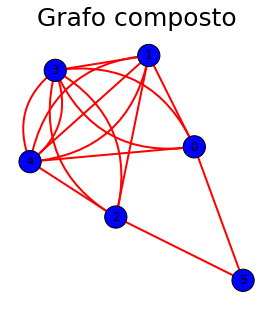

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
plt.title("Grafo composto", fontsize = 25)

ig.plot(
  g_compose, 
  target=ax, 
  vertex_color="blue", 
  vertex_label=range(g_compose.vcount()), 
  edge_color='red',  
  edge_align_label=True)
plt.show()

## Operações de conversão

### Grafos dirigidos em não dirigidos


In [ ]:
edgelist = [(0, 1), (0, 2), (1, 2), (2, 3), (2, 5), (4, 3), (4, 1)]
g =  ig.Graph(n = 5, edges = edgelist, directed = True) 

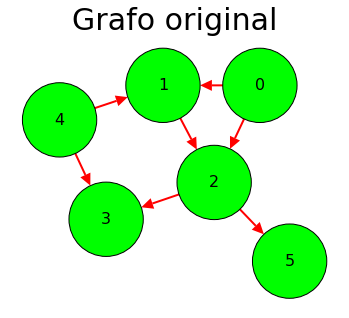

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.title("Grafo original", fontsize = 30)
ig.plot(g, 
        target=ax, 
        vertex_label=range(g.vcount()), 
        vertex_color="green", 
        vertex_label_size=16,
        vertex_size = 0.6,
        edge_color="red",        
        edge_align_label=True,
        edge_background='white',
        edge_spacing = 15,
        layout="kk")
plt.show()

In [ ]:
g.to_undirected()

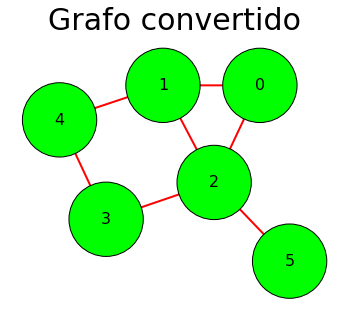

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.title("Grafo convertido", fontsize = 30)
ig.plot(g, 
        target=ax, 
        vertex_label=range(g.vcount()), 
        vertex_color="green", 
        vertex_label_size=16,
        vertex_size = 0.6,
        edge_color="red",
        edge_align_label=True,
        edge_background='white',
        edge_spacing = 15,
        layout="kk")
plt.show()

### Grafos nao dirigidos em dirigidos

In [ ]:
g.to_directed()

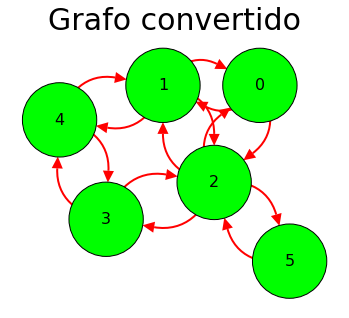

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.title("Grafo convertido", fontsize = 30)
ig.plot(g, 
        target=ax, 
        vertex_label=range(g.vcount()), 
        vertex_color="green", 
        vertex_label_size=16,
        vertex_size = 0.6,
        edge_color="red",
        edge_align_label=True,
        edge_background='white',
        edge_spacing = 15,
        layout="kk")
plt.show()

### Grafos ponderados em nao ponderados

In [ ]:
edgelist = [(0, 1), (0, 2), (1, 2), (2, 3), (2, 5), (4, 3), (4, 1)]
edge_weights = {'weight': [0.1, 1.3, 100.5, 50.6, 0.03, 5.3, 9.1, 15.9, 0.001]}
g = ig.Graph(n = 6, 
             edges = edgelist,
             edge_attrs = edge_weights,
             directed = False)

In [ ]:
## Fazer criar novo grafo e adicionar todas arestas e  vertices do anterior e não adicionar o peso.

# Propriedades estruturais de grafos

### Detectar componentes de uma rede

In [ ]:
edgelist = [(0, 1), (1, 2), (2, 3), (3, 1), (4, 1), (2, 4), (5, 6), (9, 8)]
g = ig.Graph(n = 8, edges = edgelist, directed = False)

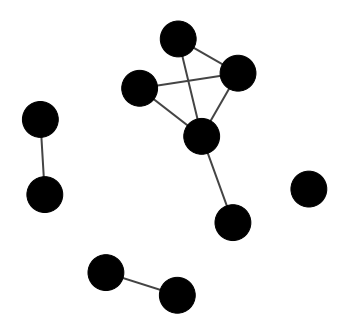

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ig.plot(g, 
        target=ax, 
        vertex_label=range(g.vcount()), 
        vertex_color="black", 
        vertex_label_size=16,
        vertex_size = 0.6,
        edge_align_label=True,
        edge_background='white',
        edge_spacing = 15,
        layout="kk")
plt.show()

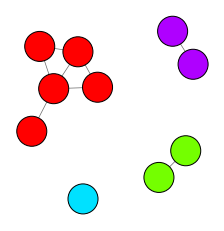

Clustering with 10 elements and 4 clusters
[0] 0, 1, 2, 3, 4
[1] 5, 6
[2] 7
[3] 8, 9


In [ ]:
Gcc = g.connected_components()

fig, ax = plt.subplots()

ig.plot(
  Gcc, 
  target = ax,
  palette = ig.RainbowPalette(),
  vertex_size = 0.7,
  vertex_color = list(map(int, ig.rescale(Gcc.membership, (0, 200), clamp = True))),
  edge_width = 0.7
)
plt.show()

print(Gcc)

In [ ]:
# Detectando maior componente da rede
print(Gcc[0])

[0, 1, 2, 3, 4]


### Acessar vizinhos em uma rede

### Medidas de conectividade

### Medidas de centralidade

### Medidas de transitividade